In [1]:
import hifive
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyBigWig


In [2]:
hic=hifive.HiC('project', 'r')
data = hic.cis_heatmap('chr13', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)
print(data)

[[[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 ...

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [1.3408000e+04 8.7311667e-01]
  [2.4900000e+03 1.0417298e+00]
  [4.3400000e+02 7.7956390e-01]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [2.4900000e+03 1.0417298e+00]
  [1.8256000e+04 1.2429050e+00]
  [1.9310000e+03 9.3011051e-

Finding fend full array for chr13:1000000-120250001... Done


In [3]:
#np.where(data>0[:, :, 1])
np.asarray(data[:,:,1]).nonzero()

(array([  20,   20,   20, ..., 1192, 1192, 1192]),
 array([  20,   21,   22, ..., 1190, 1191, 1192]))

In [4]:
#enrichment = data[:,:,0]/np.asarray(data[:,:,1]).nonzero()

In [5]:
# count=0
# for i in data:
#     enrichment = data[:, :, count] / data[:, :, count+1]
#     count = count + 1
#     if enrichment == NaN:
#         continue

In [6]:
ndata = data + 1

In [7]:
enrichment = ndata[:, :, 0] / ndata[:, :, 1]

In [8]:
log = np.log(enrichment)

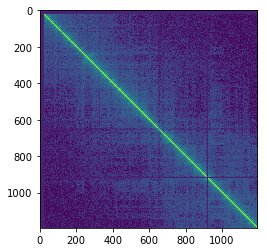

In [9]:
fig, ax = plt.subplots()
heatmap = ax.imshow(log)

In [10]:
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Casting complex values to real discards the imaginary part


In [11]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']
len(X)
#len(Y)

1168

In [85]:
print(X)

[[  3000000   3100000]
 [  3100000   3200000]
 [  3200000   3300000]
 ...
 [120000000 120100000]
 [120100000 120200000]
 [120200000 120300000]]


In [80]:
print(len(Y))


1168


In [92]:
full_list= []
for i,j in zip(X,Y):
    combined= []
    combined.append(int(i[0]))
    combined.append(int(i[1]))
    combined.append(float(j))
    full_list.append(combined)
    
print(full_list)

[[3000000, 3100000, -0.005205014254897833], [3100000, 3200000, -0.004577665589749813], [3200000, 3300000, 0.0006166427629068494], [3300000, 3400000, 0.005744491703808308], [3400000, 3500000, 0.017047017812728882], [3500000, 3600000, 0.02855036035180092], [3600000, 3700000, 0.021226979792118073], [3700000, 3800000, 0.014094607904553413], [3800000, 3900000, 0.019423427060246468], [3900000, 4000000, 0.011376327835023403], [4000000, 4100000, -0.000716442649718374], [4100000, 4200000, -0.0016749491915106773], [4200000, 4300000, 0.0009275401243939996], [4300000, 4400000, -0.009330827742815018], [4400000, 4500000, -0.017515694722533226], [4500000, 4600000, -0.017383327707648277], [4600000, 4700000, -0.012337582185864449], [4700000, 4800000, -0.01043751835823059], [4800000, 4900000, -0.01643807254731655], [4900000, 5000000, -0.02631985954940319], [5000000, 5100000, -0.030430033802986145], [5100000, 5200000, -0.02739408239722252], [5200000, 5300000, -0.027019385248422623], [5300000, 5400000, -0

Casting complex values to real discards the imaginary part


In [116]:
loc_val_negs = []
loc_val_pos = []
for i in full_list:
    if i[2] < 0:
        loc_val_negs.append(i)
    if i[2] > 0:
        loc_val_pos.append(i)
        
print(loc_val_negs)

[[3000000, 3100000, -0.005205014254897833], [3100000, 3200000, -0.004577665589749813], [4000000, 4100000, -0.000716442649718374], [4100000, 4200000, -0.0016749491915106773], [4300000, 4400000, -0.009330827742815018], [4400000, 4500000, -0.017515694722533226], [4500000, 4600000, -0.017383327707648277], [4600000, 4700000, -0.012337582185864449], [4700000, 4800000, -0.01043751835823059], [4800000, 4900000, -0.01643807254731655], [4900000, 5000000, -0.02631985954940319], [5000000, 5100000, -0.030430033802986145], [5100000, 5200000, -0.02739408239722252], [5200000, 5300000, -0.027019385248422623], [5300000, 5400000, -0.020318862050771713], [5400000, 5500000, -0.012196935713291168], [5900000, 6000000, -0.0005907175946049392], [6000000, 6100000, -0.010093697346746922], [6100000, 6200000, -0.01736394315958023], [6200000, 6300000, -0.020473333075642586], [6300000, 6400000, -0.021471505984663963], [6400000, 6500000, -0.004469588398933411], [6800000, 6900000, -0.006479352712631226], [6900000, 700

In [44]:
import pandas as pd
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
#print(X)
df_X

Casting complex values to real discards the imaginary part


,0,1
0,3000000,3100000
1,3100000,3200000
2,3200000,3300000
3,3300000,3400000
4,3400000,3500000
5,3500000,3600000
6,3600000,3700000
7,3700000,3800000
8,3800000,3900000
9,3900000,4000000


Casting complex values to real discards the imaginary part


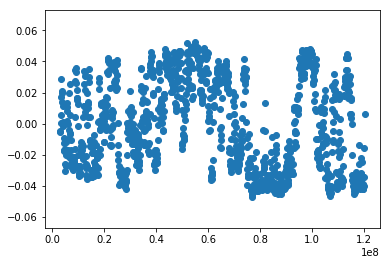

In [12]:
# plot your compartment scores
# fig, ax = plt.subplots()
# ax = plt.subplots(X,Y)
plt.scatter(X[:,0], Y)
#Okay. I checked and they are the same size.  
#Is this why I need python 2?


In [77]:
#So, the next thing you are going to do is to 
#split genes into two groups determined by which compartment they 
#fall at least 50% into (positive vs. negative scores) and 
#plot each group of gene expressions separately in a violin plot in 
#matplotlib
print(X)

[[  3000000   3100000]
 [  3100000   3200000]
 [  3200000   3300000]
 ...
 [120000000 120100000]
 [120100000 120200000]
 [120200000 120300000]]


In [14]:
#print(X[2])
Xneg=[]
for i in X:
    if np.any(i<0):
        Xneg.append(i)    
        
print(Xneg)

[]


In [15]:
Yneg=[]
Ypos=[]
for i in Y:
    if np.any(i<0):
        Yneg.append(i)
    else:
        Ypos.append(i)

[(-0.0052050143+0j), (-0.0045776656+0j), (-0.00071644265+0j), (-0.0016749492+0j), (-0.009330828+0j), (-0.017515695+0j), (-0.017383328+0j), (-0.012337582+0j), (-0.010437518+0j), (-0.016438073+0j), (-0.02631986+0j), (-0.030430034+0j), (-0.027394082+0j), (-0.027019385+0j), (-0.020318862+0j), (-0.012196936+0j), (-0.0005907176+0j), (-0.010093697+0j), (-0.017363943+0j), (-0.020473333+0j), (-0.021471506+0j), (-0.0044695884+0j), (-0.0064793527+0j), (-0.0062380526+0j), (-0.010837292+0j), (-0.01713505+0j), (-0.02320398+0j), (-0.026404008+0j), (-0.022443792+0j), (-0.021703826+0j), (-0.02542786+0j), (-0.02865786+0j), (-0.02810516+0j), (-0.02991857+0j), (-0.025552578+0j), (-0.023069825+0j), (-0.021354793+0j), (-0.024626458+0j), (-0.023200313+0j), (-0.024971219+0j), (-0.016576303+0j), (-0.0017709864+0j), (-0.020638699+0j), (-0.027288653+0j), (-0.032124504+0j), (-0.033673257+0j), (-0.029303854+0j), (-0.033512354+0j), (-0.033458713+0j), (-0.03170579+0j), (-0.031931438+0j), (-0.027112499+0j), (-0.02049

In [16]:

# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# axs[0, 0].violinplot(Ynegs, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[0, 1].violinplot(Ypos, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)

{u'bodies': [<matplotlib.collections.PolyCollection at 0x7fd9352e9e50>],
 u'cbars': <matplotlib.collections.LineCollection at 0x7fd9352c5610>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x7fd9352e9d90>,
 u'cmins': <matplotlib.collections.LineCollection at 0x7fd9352c5350>}

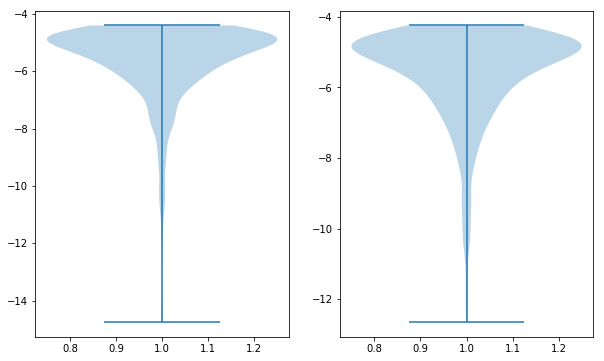

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axs[0].violinplot(np.log2(Yneg))
axs[1].violinplot(np.log2(Ypos))

In [18]:
bw = pyBigWig.open('/Users/cmdb/qbb2020answers2/week9/data/WT_H3K27me3.bw')
bw.stats('chr13', 1100000, 1200000, type='sum')

[None]

In [19]:
bw.stats('chr13', 1100000, 1200000, type='sum')

[None]

In [117]:
# x = 1100000
# y = 1200000

trimeth_neg = []
location_neg = []
for i in loc_val_negs:
    start = i[0]
    end = i[1]
    value = bw.stats('chr13', start, end, type='sum')
    trimeth_neg.append(value)
    location_neg.append(i[0])

In [118]:
trimeth_pos = []
location_pos = []
for i in loc_val_pos:
    start = i[0]
    end = i[1]
    value = bw.stats('chr13', start, end, type='sum')
    trimeth_pos.append(value)
    location_pos.append(i[0])

RuntimeError: Invalid interval bounds!

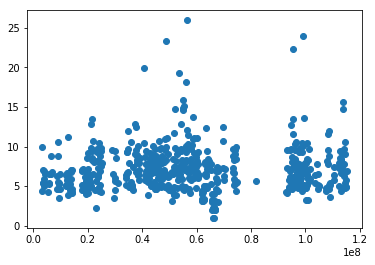

In [119]:
plt.scatter(location_pos, trimeth_pos)

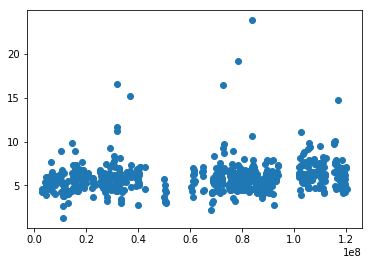

In [120]:
plt.scatter(location_neg, trimeth_neg)